##### Name - Shunottara Alhat
# Assignment 9 -- Prepare rules for the all the data sets 
# 1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
# 2) Change the minimum length in apriori algorithm
# 3) Visulize the obtained rules using different plots 

In [1]:
#!pip install mlxtend

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

import warnings
warnings.filterwarnings('ignore')

In [3]:
Book = pd.read_csv('book.csv')
Book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [4]:
Book.shape

(2000, 11)

# Aprori Algorithm

In [5]:
frequent_itemsets_ap = apriori(Book, min_support = 0.1)

In [6]:
print(len(frequent_itemsets_ap))

39


In [7]:
frequent_itemsets_ap = apriori(Book, min_support = 0.1, use_colnames = True, verbose = 1)
print(frequent_itemsets_ap.head())

Processing 44 combinations | Sampling itemset size 4
   support    itemsets
0   0.4230  (ChildBks)
1   0.2475  (YouthBks)
2   0.4310   (CookBks)
3   0.2820  (DoItYBks)
4   0.2145    (RefBks)


In [8]:
frequent_itemsets_ap.sort_values("support", ascending = False).head()

,support,itemsets
2,0.431,(CookBks)
0,0.423,(ChildBks)
3,0.282,(DoItYBks)
6,0.276,(GeogBks)
10,0.256,"(CookBks, ChildBks)"


In [9]:
Rules_Ap = association_rules(frequent_itemsets_ap, metric = "confidence", min_threshold = 0.4)
print(Rules_Ap.head())

  antecedents consequents  antecedent support  consequent support  support  \
0  (YouthBks)  (ChildBks)              0.2475               0.423    0.165   
1   (CookBks)  (ChildBks)              0.4310               0.423    0.256   
2  (ChildBks)   (CookBks)              0.4230               0.431    0.256   
3  (DoItYBks)  (ChildBks)              0.2820               0.423    0.184   
4  (ChildBks)  (DoItYBks)              0.4230               0.282    0.184   

   confidence      lift  leverage  conviction  
0    0.666667  1.576044  0.060308    1.731000  
1    0.593968  1.404179  0.073687    1.421069  
2    0.605201  1.404179  0.073687    1.441240  
3    0.652482  1.542511  0.064714    1.660347  
4    0.434988  1.542511  0.064714    1.270770  


In [10]:
Rules_Ap[(Rules_Ap.support > 0.015) & (Rules_Ap.confidence > 0.4)].sort_values("confidence", ascending = False).shape

(70, 9)

In [11]:
Rules_Ap['Lhs items'] = Rules_Ap['antecedents'].apply(lambda x:len(x) )
Rules_Ap[Rules_Ap['Lhs items'] > 1].sort_values('lift', ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,Lhs items
57,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,2
59,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,2
68,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,2
66,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,2
40,"(CookBks, ChildBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277,2


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'ArtBks'),
  Text(1.5, 0, 'ChildBks'),
  Text(2.5, 0, 'CookBks'),
  Text(3.5, 0, 'DoItYBks'),
  Text(4.5, 0, 'GeogBks'),
  Text(5.5, 0, 'RefBks'),
  Text(6.5, 0, 'YouthBks')])

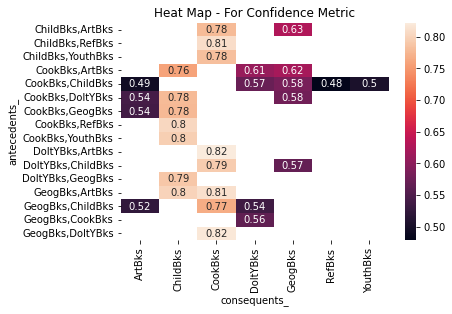

In [12]:
Rules_Ap['antecedents_'] = Rules_Ap['antecedents'].apply(lambda a: ','.join(list(a)))
Rules_Ap['consequents_'] = Rules_Ap['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the confidence metric

pivot = Rules_Ap[Rules_Ap['Lhs items'] > 1].pivot(index = 'antecedents_', columns = 'consequents_', values= 'confidence')

# Generate a heatmap with annotations 
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [13]:
Rules_Ap_Li = association_rules(frequent_itemsets_ap, metric = "lift", min_threshold = 0.6)
print(Rules_Ap_Li.shape)

(100, 9)


In [14]:
Rules_Ap_Li['Lhs items'] = Rules_Ap_Li['antecedents'].apply(lambda x:len(x) )
Rules_Ap_Li[Rules_Ap_Li['Lhs items'] > 1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,Lhs items
78,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,2
82,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,2
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,2
94,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,2
52,"(CookBks, ChildBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277,2


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'ArtBks'),
  Text(1.5, 0, 'ChildBks'),
  Text(2.5, 0, 'CookBks'),
  Text(3.5, 0, 'DoItYBks'),
  Text(4.5, 0, 'GeogBks'),
  Text(5.5, 0, 'RefBks'),
  Text(6.5, 0, 'YouthBks')])

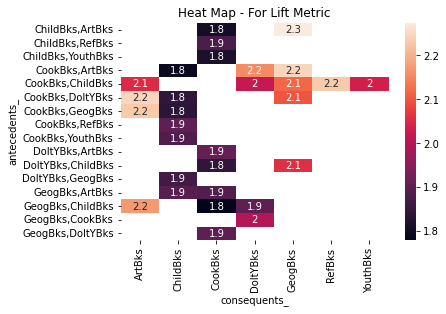

In [15]:
# Replace frozen sets with strings
Rules_Ap_Li['antecedents_'] = Rules_Ap_Li['antecedents'].apply(lambda a: ','.join(list(a)))
Rules_Ap_Li['consequents_'] = Rules_Ap_Li['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = Rules_Ap_Li[Rules_Ap_Li['Lhs items']>1].pivot(index = 'antecedents_', columns = 'consequents_', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Lift Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

# FpGrowth Algorithm

In [16]:
frequent_itemsets_FP = fpgrowth(Book, min_support=0.1, use_colnames=True, verbose=1)
print(frequent_itemsets_FP.shape)

9 itemset(s) from tree conditioned on items ()
2 itemset(s) from tree conditioned on items (DoItYBks)
1 itemset(s) from tree conditioned on items (DoItYBks, ChildBks)
0 itemset(s) from tree conditioned on items (DoItYBks, CookBks)
3 itemset(s) from tree conditioned on items (GeogBks)
2 itemset(s) from tree conditioned on items (GeogBks, DoItYBks)
0 itemset(s) from tree conditioned on items (GeogBks, DoItYBks, CookBks)
0 itemset(s) from tree conditioned on items (GeogBks, DoItYBks, ChildBks)
0 itemset(s) from tree conditioned on items (GeogBks, ChildBks)
1 itemset(s) from tree conditioned on items (GeogBks, CookBks)
4 itemset(s) from tree conditioned on items (YouthBks)
0 itemset(s) from tree conditioned on items (YouthBks, GeogBks)
0 itemset(s) from tree conditioned on items (YouthBks, DoItYBks)
0 itemset(s) from tree conditioned on items (YouthBks, ChildBks)
1 itemset(s) from tree conditioned on items (YouthBks, CookBks)
1 itemset(s) from tree conditioned on items (ChildBks)
0 itemset

In [17]:
frequent_itemsets_FP.sort_values("support", ascending = False).head()

,support,itemsets
4,0.431,(CookBks)
3,0.423,(ChildBks)
0,0.282,(DoItYBks)
1,0.276,(GeogBks)
23,0.256,"(CookBks, ChildBks)"


In [18]:
Rules_FP = association_rules(frequent_itemsets_FP, metric = "confidence", min_threshold = 0.5)
print(Rules_FP.shape)

(49, 9)


In [19]:
Rules_FP[(Rules_FP.support > 0.15) & (Rules_FP.confidence > 0.4)].sort_values("confidence", ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
26,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
6,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
27,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
7,(GeogBks),(CookBks),0.2760,0.431,0.1925,0.697464,1.618245,0.073544,1.880766
34,(ArtBks),(CookBks),0.2410,0.431,0.1670,0.692946,1.607763,0.063129,1.853095


In [20]:
Rules_FP['Lhs items'] = Rules_FP['antecedents'].apply(lambda x:len(x) )
Rules_FP[Rules_FP['Lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,Lhs items
47,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.276,0.1020,0.627692,2.274247,0.057150,1.944628,2
39,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.241,0.1015,0.541333,2.246196,0.056313,1.654797,2
44,"(CookBks, ArtBks)",(GeogBks),0.1670,0.276,0.1035,0.619760,2.245509,0.057408,1.904063,2
42,"(CookBks, GeogBks)",(ArtBks),0.1925,0.241,0.1035,0.537662,2.230964,0.057107,1.641657,2
45,"(GeogBks, ChildBks)",(ArtBks),0.1950,0.241,0.1020,0.523077,2.170444,0.055005,1.591452,2


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'ArtBks'),
  Text(1.5, 0, 'ChildBks'),
  Text(2.5, 0, 'CookBks'),
  Text(3.5, 0, 'DoItYBks'),
  Text(4.5, 0, 'GeogBks'),
  Text(5.5, 0, 'YouthBks')])

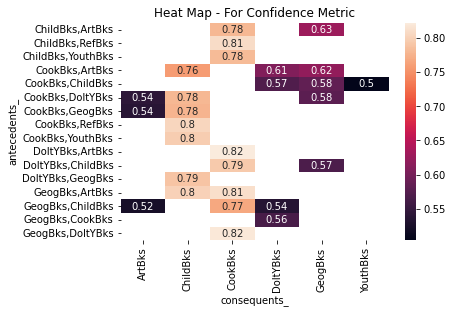

In [21]:
Rules_FP['antecedents_'] = Rules_FP['antecedents'].apply(lambda a: ','.join(list(a)))
Rules_FP['consequents_'] = Rules_FP['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = Rules_FP[Rules_FP['Lhs items']>1].pivot(index = 'antecedents_', columns = 'consequents_', values= 'confidence')

# Generate a heatmap with annotations 
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [22]:
Rules_FP_Li = association_rules(frequent_itemsets_FP, metric="lift", min_threshold=0.6)
print(Rules_FP_Li.shape)

(100, 9)


In [23]:
Rules_FP_Li['Lhs items'] = Rules_FP_Li['antecedents'].apply(lambda x:len(x) )
Rules_FP_Li[Rules_FP_Li['Lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,Lhs items
94,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,2
80,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,2
88,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,2
86,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,2
58,"(CookBks, ChildBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277,2


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'ArtBks'),
  Text(1.5, 0, 'ChildBks'),
  Text(2.5, 0, 'CookBks'),
  Text(3.5, 0, 'DoItYBks'),
  Text(4.5, 0, 'GeogBks'),
  Text(5.5, 0, 'RefBks'),
  Text(6.5, 0, 'YouthBks')])

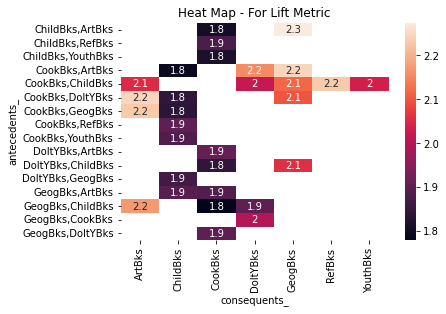

In [24]:
# Replace frozen sets with strings
Rules_FP_Li['antecedents_'] = Rules_FP_Li['antecedents'].apply(lambda a: ','.join(list(a)))
Rules_FP_Li['consequents_'] = Rules_FP_Li['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = Rules_FP_Li[Rules_FP_Li['Lhs items'] > 1].pivot(index = 'antecedents_', columns = 'consequents_', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Lift Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

# MY MOVIES Dataset

In [25]:
Movie = pd.read_csv('my_movies.csv')
Movie

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [26]:
# Get list of categorical variables

CatList = (Movie.dtypes == 'object')
Object_Cols = list(CatList[CatList].index)

print("Categorical variables:")
print(Object_Cols)

Categorical variables:
['V1', 'V2', 'V3', 'V4', 'V5']


In [27]:
Num_Movie = Movie.iloc[:,5:15]
Num_Movie.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


# Apriori Algorithm

In [28]:
Frequent_itemsets_AP = apriori(Num_Movie, min_support = 0.15, use_colnames = True, verbose = 1)
print(Frequent_itemsets_AP.head())

Processing 27 combinations | Sampling itemset size 3
   support         itemsets
0      0.6    (Sixth Sense)
1      0.7      (Gladiator)
2      0.2          (LOTR1)
3      0.2  (Harry Potter1)
4      0.6        (Patriot)


In [29]:
Frequent_itemsets_AP.sort_values("support", ascending = False).shape

(13, 2)

In [30]:
Rules_AP = association_rules(Frequent_itemsets_AP, metric="confidence", min_threshold=0.1)
print(Rules_AP.head())

     antecedents    consequents  antecedent support  consequent support  \
0  (Sixth Sense)    (Gladiator)                 0.6                 0.7   
1    (Gladiator)  (Sixth Sense)                 0.7                 0.6   
2      (Patriot)  (Sixth Sense)                 0.6                 0.6   
3  (Sixth Sense)      (Patriot)                 0.6                 0.6   
4  (Sixth Sense)   (Green Mile)                 0.6                 0.2   

   support  confidence      lift  leverage  conviction  
0      0.5    0.833333  1.190476      0.08         1.8  
1      0.5    0.714286  1.190476      0.08         1.4  
2      0.4    0.666667  1.111111      0.04         1.2  
3      0.4    0.666667  1.111111      0.04         1.2  
4      0.2    0.333333  1.666667      0.08         1.2  


In [31]:
Rules_AP[(Rules_AP.support > 0.015) & (Rules_AP.confidence > 0.4)].sort_values("confidence", ascending = False).shape

(15, 9)

In [32]:
Rules_AP['Lhs items'] = Rules_AP['antecedents'].apply(lambda x:len(x) )
Rules_AP[Rules_AP['Lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,Lhs items
10,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,2
12,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,2
11,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,2


(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'Gladiator'),
  Text(1.5, 0, 'Patriot'),
  Text(2.5, 0, 'Sixth Sense')])

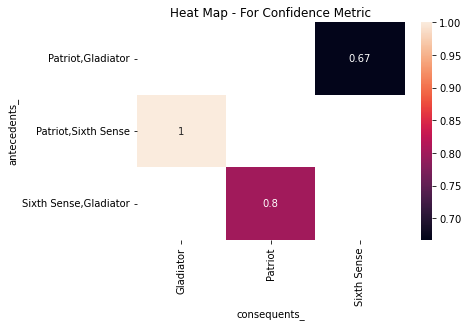

In [33]:
Rules_AP['antecedents_'] = Rules_AP['antecedents'].apply(lambda a: ','.join(list(a)))
Rules_AP['consequents_'] = Rules_AP['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = Rules_AP[Rules_AP['Lhs items'] > 1].pivot(index = 'antecedents_', columns = 'consequents_', values= 'confidence')

# Generate a heatmap with annotations 
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [34]:
Rules_AP_Li = association_rules(Frequent_itemsets_AP, metric="lift", min_threshold=0.8)
print(Rules_AP_Li.shape)

(16, 9)


In [35]:
Rules_AP_Li['Lhs items'] = Rules_AP_Li['antecedents'].apply(lambda x:len(x) )
Rules_AP_Li[Rules_AP_Li['Lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,Lhs items
10,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,2
12,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,2
11,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,2


(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'Gladiator'),
  Text(1.5, 0, 'Patriot'),
  Text(2.5, 0, 'Sixth Sense')])

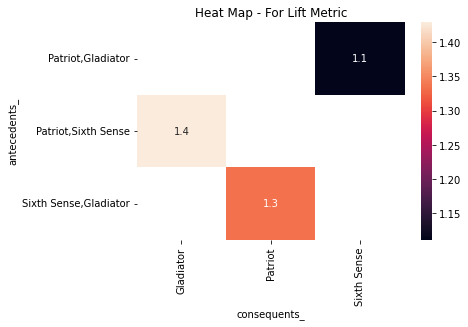

In [36]:
# Replace frozen sets with strings
Rules_AP_Li['antecedents_'] = Rules_AP_Li['antecedents'].apply(lambda a: ','.join(list(a)))
Rules_AP_Li['consequents_'] = Rules_AP_Li['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = Rules_AP_Li[Rules_AP_Li['Lhs items']>1].pivot(index = 'antecedents_', columns = 'consequents_', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Lift Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

# FpGrowth Algorithm

In [37]:
Frequent_itemsets_Fp = fpgrowth(Num_Movie, min_support=0.1, use_colnames=True,verbose=1)
print(Frequent_itemsets_Fp.shape)

10 itemset(s) from tree conditioned on items ()
3 itemset(s) from tree conditioned on items (Sixth Sense)
3 itemset(s) from tree conditioned on items (Green Mile)
3 itemset(s) from tree conditioned on items (LOTR2)
7 itemset(s) from tree conditioned on items (Harry Potter1)
15 itemset(s) from tree conditioned on items (LOTR1)
0 itemset(s) from tree conditioned on items (Gladiator)
1 itemset(s) from tree conditioned on items (Patriot)
3 itemset(s) from tree conditioned on items (Braveheart)
1 itemset(s) from tree conditioned on items (Harry Potter2)
7 itemset(s) from tree conditioned on items (LOTR)
(53, 2)


In [38]:
Frequent_itemsets_Fp.sort_values("support", ascending = False).head()

,support,itemsets
5,0.7,(Gladiator)
0,0.6,(Sixth Sense)
41,0.6,"(Patriot, Gladiator)"
6,0.6,(Patriot)
10,0.5,"(Sixth Sense, Gladiator)"


In [39]:
Rules_Fp = association_rules(Frequent_itemsets_Fp, metric="confidence", min_threshold=0.8)
print(Rules_Fp.head())

                antecedents    consequents  antecedent support  \
0             (Sixth Sense)    (Gladiator)                 0.6   
1    (Patriot, Sixth Sense)    (Gladiator)                 0.4   
2  (Sixth Sense, Gladiator)      (Patriot)                 0.5   
3              (Green Mile)  (Sixth Sense)                 0.2   
4   (Green Mile, Gladiator)  (Sixth Sense)                 0.1   

   consequent support  support  confidence      lift  leverage  conviction  
0                 0.7      0.5    0.833333  1.190476      0.08         1.8  
1                 0.7      0.4    1.000000  1.428571      0.12         inf  
2                 0.6      0.4    0.800000  1.333333      0.10         2.0  
3                 0.6      0.2    1.000000  1.666667      0.08         inf  
4                 0.6      0.1    1.000000  1.666667      0.04         inf  


In [40]:
Rules_Fp[(Rules_Fp.support > 0.1) & (Rules_Fp.confidence > 0.4)].sort_values("confidence", ascending = False).shape

(8, 9)

In [41]:
Rules_Fp['Lhs items'] = Rules_Fp['antecedents'].apply(lambda x:len(x) )
Rules_Fp[Rules_Fp['Lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,Lhs items
126,"(Green Mile, Gladiator)","(LOTR, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,2
87,"(Harry Potter1, Sixth Sense, LOTR1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3
85,"(LOTR2, Harry Potter1, Green Mile)","(Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3
84,"(LOTR2, Harry Potter1, Sixth Sense)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3
81,"(LOTR2, Green Mile, LOTR1)","(Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3


(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5]),
 [Text(0.5, 0, 'Gladiator'),
  Text(2.5, 0, 'Green Mile,Gladiator'),
  Text(4.5, 0, 'Harry Potter1'),
  Text(6.5, 0, 'Harry Potter1,Green Mile,LOTR1'),
  Text(8.5, 0, 'Harry Potter1,Sixth Sense'),
  Text(10.5, 0, 'LOTR'),
  Text(12.5, 0, 'LOTR1'),
  Text(14.5, 0, 'LOTR2,Green Mile'),
  Text(16.5, 0, 'LOTR2,Harry Potter1'),
  Text(18.5, 0, 'LOTR2,Harry Potter1,Sixth Sense'),
  Text(20.5, 0, 'LOTR2,Sixth Sense'),
  Text(22.5, 0, 'LOTR2,Sixth Sense,LOTR1'),
  Text(24.5, 0, 'Sixth Sense'),
  Text(26.5, 0, 'Sixth Sense,Green Mile'),
  Text(28.5, 0, 'Sixth Sense,LOTR1,Green Mile')])

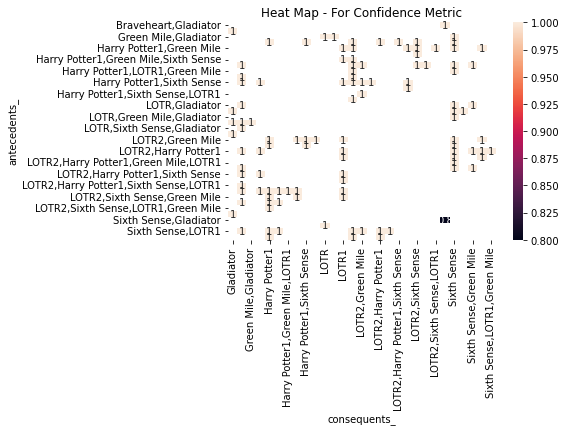

In [42]:
Rules_Fp['antecedents_'] = Rules_Fp['antecedents'].apply(lambda a: ','.join(list(a)))
Rules_Fp['consequents_'] = Rules_Fp['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = Rules_Fp[Rules_Fp['Lhs items']>1].pivot(index = 'antecedents_', columns = 'consequents_', values= 'confidence')

# Generate a heatmap with annotations 
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [43]:
Rules_Fp_Li = association_rules(Frequent_itemsets_Fp, metric="lift", min_threshold=0.8)
print(Rules_Fp_Li.shape)

(246, 9)


In [44]:
Rules_Fp_Li['Lhs items'] = Rules_Fp_Li['antecedents'].apply(lambda x:len(x) )
Rules_Fp_Li[Rules_Fp_Li['Lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,Lhs items
241,"(Green Mile, Gladiator)","(LOTR, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,2
58,"(Harry Potter1, Green Mile)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,2
176,"(Harry Potter1, Sixth Sense, LOTR1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3
175,"(Sixth Sense, LOTR1, Green Mile)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3
174,"(LOTR2, Harry Potter1, Green Mile)","(Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3


(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5, 32.5]),
 [Text(0.5, 0, 'Braveheart'),
  Text(2.5, 0, 'Green Mile'),
  Text(4.5, 0, 'Green Mile,LOTR1'),
  Text(6.5, 0, 'Harry Potter1,Green Mile'),
  Text(8.5, 0, 'Harry Potter1,LOTR1'),
  Text(10.5, 0, 'Harry Potter1,Sixth Sense,Green Mile'),
  Text(12.5, 0, 'LOTR'),
  Text(14.5, 0, 'LOTR,Green Mile'),
  Text(16.5, 0, 'LOTR1'),
  Text(18.5, 0, 'LOTR2,Green Mile'),
  Text(20.5, 0, 'LOTR2,Harry Potter1'),
  Text(22.5, 0, 'LOTR2,Harry Potter1,LOTR1'),
  Text(24.5, 0, 'LOTR2,LOTR1'),
  Text(26.5, 0, 'LOTR2,Sixth Sense,Green Mile'),
  Text(28.5, 0, 'Patriot'),
  Text(30.5, 0, 'Sixth Sense,Gladiator'),
  Text(32.5, 0, 'Sixth Sense,LOTR1')])

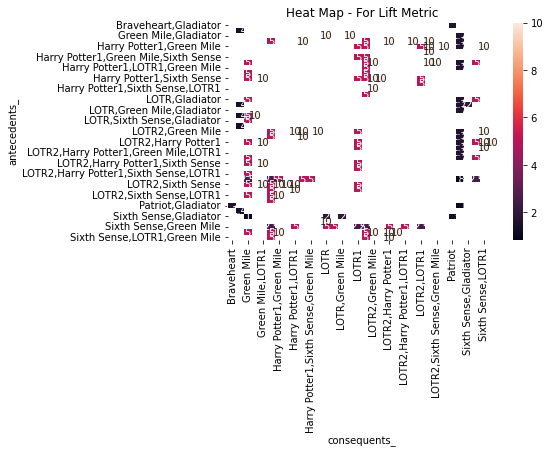

In [45]:
# Replace frozen sets with strings
Rules_Fp_Li['antecedents_'] = Rules_Fp_Li['antecedents'].apply(lambda a: ','.join(list(a)))
Rules_Fp_Li['consequents_'] = Rules_Fp_Li['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = Rules_Fp_Li[Rules_Fp_Li['Lhs items']>1].pivot(index = 'antecedents_', columns = 'consequents_', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Lift Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)